In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Santiago Angulo
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson, quad, fixed_quad

# Función a integrar
f = lambda x: np.exp(3 * x) * np.sin(x)

# Límites
a, b = 0, np.pi / 4

# Valor exacto usando quad
exacto, _ = quad(f, a, b)
print(f"Valor exacto (quad): {exacto:.10f}")

# n fijo para impresión directa de resultados con n=100
n = 100
x = np.linspace(a, b, n)
y = f(x)

trap = trapezoid(y, x)
simp = simpson(y, x)

print(f"Integral con método del trapecio (n={n}): {trap:.10f}")
print(f"Error trapecio: {abs(trap - exacto):.2e}")

print(f"Integral con método de Simpson (n={n}): {simp:.10f}")
print(f"Error Simpson: {abs(simp - exacto):.2e}")

Valor exacto (quad): 1.5920977079
Integral con método del trapecio (n=100): 1.5922489762
Error trapecio: 1.51e-04
Integral con método de Simpson (n=100): 1.5920977675
Error Simpson: 5.96e-08


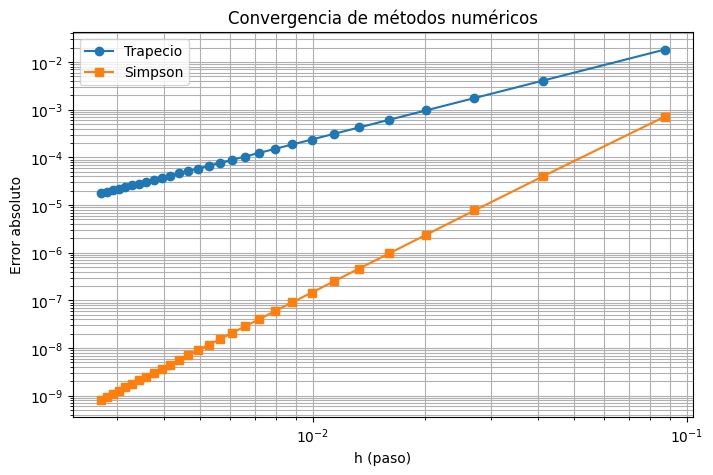

In [3]:
# Estudio de convergencia
hs = []
error_trap = []
error_simp = []

for n in range(10, 300, 10):
    x = np.linspace(a, b, n)
    y = f(x)

    h = (b - a) / (n - 1)
    hs.append(h)

    int_trap = trapezoid(y, x)
    int_simp = simpson(y, x)

    error_trap.append(abs(int_trap - exacto))
    error_simp.append(abs(int_simp - exacto))

plt.figure(figsize=(8,5))
plt.loglog(hs, error_trap, 'o-', label='Trapecio')
plt.loglog(hs, error_simp, 's-', label='Simpson')
plt.xlabel('h (paso)')
plt.ylabel('Error absoluto')
plt.title('Convergencia de métodos numéricos')
plt.legend()
plt.grid(True, which='both')
plt.show()


In [4]:
# fixed_quad con distintos valores
print("\nMétodo fixed_quad:")
for n in [2, 4, 6, 8, 10, 20]:
    resultado, _ = fixed_quad(f, a, b, n=n)
    print(f"  n={n:2d} → integral: {resultado:.10f} | error: {abs(resultado - exacto):.2e}")



Método fixed_quad:
  n= 2 → integral: 1.5687508629 | error: 2.33e-02
  n= 4 → integral: 1.5920973834 | error: 3.25e-07
  n= 6 → integral: 1.5920977079 | error: 2.44e-11
  n= 8 → integral: 1.5920977079 | error: 8.88e-16
  n=10 → integral: 1.5920977079 | error: 1.78e-15
  n=20 → integral: 1.5920977079 | error: 1.33e-15


#Ahora la sigueinte integral

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, simpson, quad, fixed_quad

# Segunda función
f2 = lambda x: 1 / (x * np.log(x))

# Límites
a2, b2 = np.e, np.e + 1

# Valor exacto con quad
exacto2, _ = quad(f2, a2, b2)
print(f"\nValor exacto (quad) segunda integral: {exacto2:.10f}")

# n fijo para impresión de integrales
n = 100
x2 = np.linspace(a2, b2, n)
y2 = f2(x2)

trap2 = trapezoid(y2, x2)
simp2 = simpson(y2, x2)

print(f"Integral Trapecio (n={n}): {trap2:.10f}")
print(f"Error Trapecio: {abs(trap2 - exacto2):.2e}")

print(f"Integral Simpson (n={n}): {simp2:.10f}")
print(f"Error Simpson: {abs(simp2 - exacto2):.2e}")



Valor exacto (quad) segunda integral: 0.2725138805
Integral Trapecio (n=100): 0.2725153570
Error Trapecio: 1.48e-06
Integral Simpson (n=100): 0.2725138805
Error Simpson: 1.05e-11


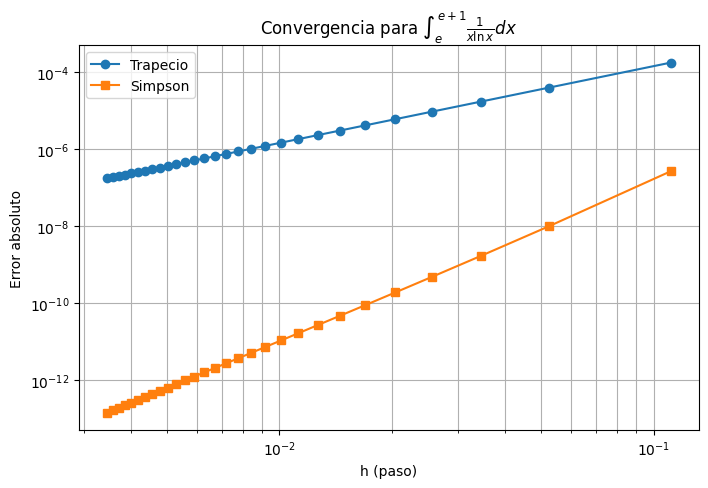

In [6]:
# Estudio de convergencia
hs2 = []
error_trap2 = []
error_simp2 = []

for n in range(10, 300, 10):
    x2 = np.linspace(a2, b2, n)
    y2 = f2(x2)

    h2 = (b2 - a2) / (n - 1)
    hs2.append(h2)

    int_trap2 = trapezoid(y2, x2)
    int_simp2 = simpson(y2, x2)

    error_trap2.append(abs(int_trap2 - exacto2))
    error_simp2.append(abs(int_simp2 - exacto2))

plt.figure(figsize=(8,5))
plt.loglog(hs2, error_trap2, 'o-', label='Trapecio')
plt.loglog(hs2, error_simp2, 's-', label='Simpson')
plt.xlabel('h (paso)')
plt.ylabel('Error absoluto')
plt.title('Convergencia para $\\int_e^{e+1} \\frac{1}{x\\ln x} dx$')
plt.legend()
plt.grid(True, which='both')
plt.show()


In [7]:

# fixed_quad
print("\nMétodo fixed_quad (segunda integral):")
for n in [2, 4, 6, 8, 10, 20]:
    resultado, _ = fixed_quad(f2, a2, b2, n=n)
    print(f"  n={n:2d} → integral: {resultado:.10f} | error: {abs(resultado - exacto2):.2e}")


Método fixed_quad (segunda integral):
  n= 2 → integral: 0.2724108727 | error: 1.03e-04
  n= 4 → integral: 0.2725138612 | error: 1.93e-08
  n= 6 → integral: 0.2725138805 | error: 3.37e-12
  n= 8 → integral: 0.2725138805 | error: 5.55e-16
  n=10 → integral: 0.2725138805 | error: 5.55e-17
  n=20 → integral: 0.2725138805 | error: 0.00e+00


#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [8]:
from scipy.integrate import quad
from numpy import sin, pi

# Más interna: integra en z desde 0 hasta x*y
def integral_mas_interna(y, x):
    integrando = lambda z: (1 / y) * sin(z / y) if y != 0 else 0
    resultado, _ = quad(integrando, 0, x * y)
    return resultado

# Intermedia: integra en y desde 0 hasta x
def integral_intermedia(x):
    integrando = lambda y: integral_mas_interna(y, x)
    resultado, _ = quad(integrando, 0, x)
    return resultado

# Más externa: integra en x desde 0 hasta pi
resultado_triple_quad, error_triple_quad = quad(integral_intermedia, 0, pi)

# Imprimir resultados
print(f"Resultado con triple quad anidado (con lambdas internas): {resultado_triple_quad:.10f}")
print(f"Error estimado por quad: {error_triple_quad:.2e}")


Resultado con triple quad anidado (con lambdas internas): 6.9348022005
Error estimado por quad: 7.70e-14


In [9]:
from scipy.integrate import tplquad
from numpy import sin, pi

# Definir el integrando como lambda
f_triple = lambda z, y, x: (1 / y) * sin(z / y) if y != 0 else 0

# Usar tplquad con los límites anidados
resultado_tplquad, error_tplquad = tplquad(
    f_triple,
    0, pi,                     # x: [0, π]
    lambda x: 0, lambda x: x, # y: [0, x]
    lambda x, y: 0, lambda x, y: x * y  # z: [0, xy]
)

# Imprimir resultado
print(f"Resultado con tplquad: {resultado_tplquad:.10f}")
print(f"Error estimado por tplquad: {error_tplquad:.2e}")


Resultado con tplquad: 6.9348022005
Error estimado por tplquad: 7.70e-14


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [10]:
import numpy as np
from scipy.special import roots_legendre

def gauss_quad_ab(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    usando cuadratura gaussiana de Legendre.

    Parameters:
    - func: función a integrar
    - a, b: límites de integración
    - n: número de puntos (grado del polinomio de Legendre)

    Returns:
    - Aproximación de la integral
    """
    # Raíces y pesos en [-1, 1]
    x_std, w_std = roots_legendre(n)

    # Cambio de variable: transformar x de [-1,1] a [a,b]
    x_ab = 0.5 * (b - a) * x_std + 0.5 * (b + a)

    # Evaluar suma ponderada
    integral = 0.5 * (b - a) *np.sum( w_std * func(x_ab))
    return integral


In [11]:
# Función más interna: integral en z de 0 a x*y
def gauss_z(y, x, n):
    if y == 0:
        return 0
    integrando = lambda z: (1 / y) * np.sin(z / y)
    return gauss_quad_ab(integrando, 0, x * y, n)

# Intermedia: integral en y de 0 a x
def gauss_y(x, n):
    integrando = lambda y: gauss_z(y, x, n)
    return gauss_quad_ab(np.vectorize(integrando), 0, x, n)

# Externa: integral en x de 0 a pi
n = 10  # puedes aumentar para mayor precisión
resultado_gauss = gauss_quad_ab(np.vectorize(lambda x: gauss_y(x, n)), 0, np.pi, n)

resultado_gauss


np.float64(6.934802200544679)